# lab2

In [91]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-1128/Warehouse_and_Retail_Sales.csv') # load the data from s3
df.head() # shows the top 5 rows

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


## View Data

In [92]:
df.head() # shows the top 5 rows

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [93]:
df.shape # shows the number of rows and columns

(307645, 9)

In [94]:
df.info() # shows the column names, non-nulls, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [95]:
df.describe() # descriptive statistics for each numeric column

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


### View Data Overview

- **Rows and Columns**: The dataset has **307,645 rows** and **9 columns**.
- **Kinds of Columns**: There are numeric and text columns in this dataset.
    - Numeric: Integer and float data types (such as Retail Sales, Retail Transfers, and Warehouse Sales).
    - Text: Strings/objects (such as Supplier and Item Type)
- **First Impressions**:
    - This dataset is large, with approximately **300,000** entries. This could be good for analysis.
    - There are some columns with missing values (Supplier, Item Type, Retail Sales)

## Explore and Clean Data

In [96]:
df.info() # shows the data types and the number of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [97]:
df = df.rename(columns={"ITEM DESCRIPTION": "DESCRIPTION", "ITEM CODE": "CODE"}) # renames the two columns
df.head() # shows the top 5 to show they were renamed

,YEAR,MONTH,SUPPLIER,CODE,DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [98]:
df.isnull().sum() # shows the number of rows that contain null values

YEAR                  0
MONTH                 0
SUPPLIER            167
CODE                  0
DESCRIPTION           0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [99]:
df = df.dropna() # drop any null values
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
CODE                0
DESCRIPTION         0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

### Data Cleaning Overview

- I renamed the **ITEM DESCRIPTION** column to **DESCRIPTION** and **ITEM CODE** to **CODE** for clarity.
- Before cleaning, there were several columns that had missing values.
    - Supplier had 167 missing.
    - Item Type had 1 missing.
    - Retail Sales had 3 missing.
- To ensure there were missing values, I used **df.isnull().sum()**, which confirmed the missing values. To handle this, I used **df.dropna()**, which removed all rows containing missing values. I ran **df.isnull().sum()** again to check that they were successfully removed. 

### Manipulate the Data

In [100]:
df['ITEM TYPE'] # selects a column

0         WINE
1         WINE
2         BEER
3         WINE
4         WINE
          ... 
307639    BEER
307640    BEER
307641    BEER
307642    BEER
307643    BEER
Name: ITEM TYPE, Length: 307477, dtype: object

In [101]:
df.sort_values(by='SUPPLIER') # sort data by column (supplier)

,YEAR,MONTH,SUPPLIER,CODE,DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
80361,2017,9,8 VINI INC,331348,SECOLI RIPASSO DELIO VAL DOC - 750ML,WINE,0.08,0.0,0.0
136181,2018,1,8 VINI INC,331348,SECOLI RIPASSO DELIO VAL DOC - 750ML,WINE,0.24,0.0,0.0
93633,2017,10,8 VINI INC,328382,REGGIANO MEDERFIL LAMB - 750ML,WINE,0.00,0.0,1.0
93840,2017,10,8 VINI INC,331348,SECOLI RIPASSO DELIO VAL DOC - 750ML,WINE,0.16,2.0,0.0
66883,2017,8,8 VINI INC,331348,SECOLI RIPASSO DELIO VAL DOC - 750ML,WINE,0.24,0.0,0.0
...,...,...,...,...,...,...,...,...,...
184901,2019,3,ZURENA LLC,300614,ZURENA LOVE ELIXIR CRAFT COCKTAIL MIXER - 750ML,NON-ALCOHOL,0.90,0.0,0.0
91493,2017,10,ZURENA LLC,300614,ZURENA LOVE ELIXIR CRAFT COCKTAIL MIXER - 750ML,NON-ALCOHOL,0.97,0.0,0.0
197627,2019,4,ZURENA LLC,300614,ZURENA LOVE ELIXIR CRAFT COCKTAIL MIXER - 750ML,NON-ALCOHOL,0.57,0.0,0.0
2702,2020,1,ZURENA LLC,300614,ZURENA LOVE ELIXIR CRAFT COCKTAIL MIXER - 750ML,NON-ALCOHOL,4.42,0.0,0.0


In [102]:
df[5:11] #slice rows 5-10

,YEAR,MONTH,SUPPLIER,CODE,DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0
10,2020,1,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,1.70,1.0,0.0


In [103]:
df[df['RETAIL SALES']>10] # shows only rows where the item sales are > 10

,YEAR,MONTH,SUPPLIER,CODE,DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
22,2020,1,JIM BEAM BRANDS CO,10197,KNOB CREEK BOURBON 9YR - 100P - 1.75L,LIQUOR,12.72,11.84,0.00
23,2020,1,STE MICHELLE WINE ESTATES,101974,CH ST MICH P/GRIS - 750ML,WINE,11.17,11.00,9.00
40,2020,1,BACARDI USA INC,10332,GREY GOOSE VODKA - 375ML,LIQUOR,33.57,36.00,0.00
45,2020,1,CASTLE BRANDS USA CORP,10375,PALLINI LIMONCELLO 6/CS - 750ML,LIQUOR,11.99,15.00,0.00
54,2020,1,BUCK DISTRIBUTING COMPANY INC,10430,STONE IPA 4/6 NR - 12OZ,BEER,33.79,45.00,120.75
...,...,...,...,...,...,...,...,...,...
307619,2020,9,CROWN IMPORTS,99198,MODELO ESPECIAL 2/12 NR - 12OZ,BEER,18.00,83.00,6362.96
307620,2020,9,CROWN IMPORTS,99201,NEGRA MODELO 2/12 NR - 12OZ,BEER,29.00,38.00,575.00
307636,2020,9,SIERRA NEVADA BREWING CO,99708,SIERRA NEVADA PALE ALE 2/12 NR - 12OZ,BEER,35.00,19.00,288.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.00,240.75


### Data Manipulation Overview

- I selected the ITEM TYPE column to view only the kinds of items. 
- Then, I sorted the dataset in ascending order by the supplier to help see the sales per supplier. 
- I sliced rows 5-10 to show a small part of the dataset.
- I filtered the data to only show the rows where the Retail Sales were > 10 in order to see which supplier is selling a lot.
- **What the Output Shows**:
    - By viewing only the item type, the output shows what kinds of items are being sold. 
    - By sorting the data by supplier, the items are being sorted by who is supplying them.
    - By slicing the data of rows 5-10, it gives an idea of part of the dataset.
    - By filtering the data when Retail Sales > 10, it only shows which supplies are selling a lot of items. 

### Visualize the Data

In [104]:
import matplotlib.pyplot as plt

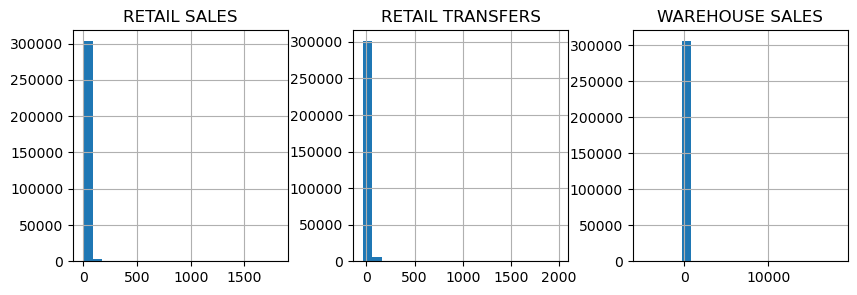

In [105]:
df[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].hist(layout=(1,3), figsize=(10,3), bins=20) # use multiple charts to show the distribution of all columns 
plt.show()

In [106]:
sum_sales_by_type = df.groupby('ITEM TYPE')['RETAIL SALES'].sum() # groups the data by ITEM TYPE and sums the total sales per type

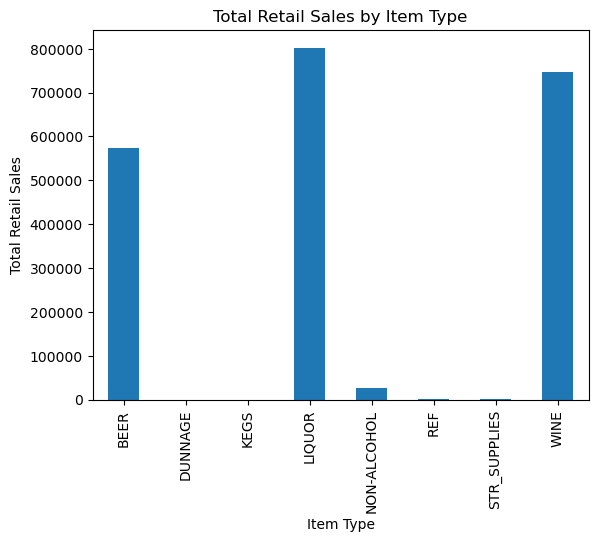

In [107]:
sum_sales_by_type.plot(kind='bar')
plt.title("Total Retail Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Total Retail Sales")
plt.xticks(rotation=90) # rotates for readability
plt.show()

### Chart # 1 Analysis

- Based on the above chart showing the Total Retail Sales by Item Type, the grouped data by item type shows that liquor is the most common retail sale, with **approximately 800,000 being sold**, followed by wine and beer at **approximately 75,000 and 55,000 items**. The top items indicate which products the suppliers should have more stock of.

In [108]:
top_item = df.groupby('DESCRIPTION')['WAREHOUSE SALES'].sum().nlargest(10) # groups the data by DESCRIPTION and sums the total sales per item, shoiwing only the top 10

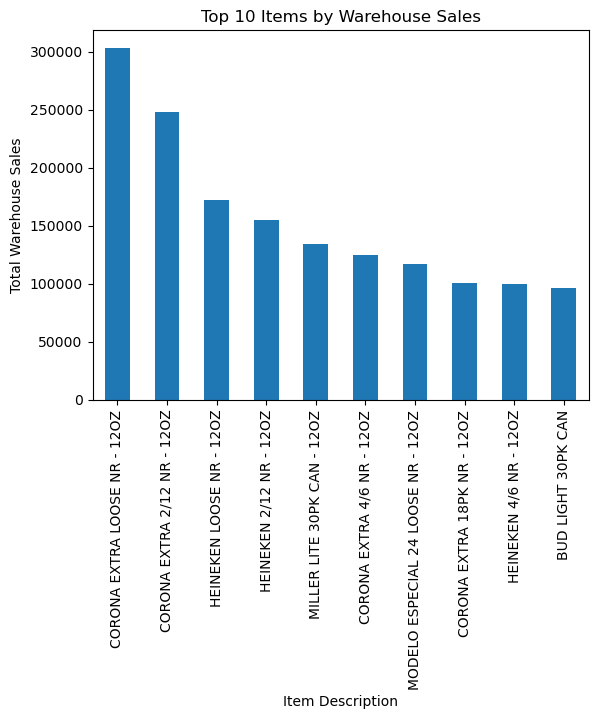

In [109]:
top_item.plot.bar()
plt.title("Top 10 Items by Warehouse Sales")
plt.xlabel("Item Description")
plt.ylabel("Total Warehouse Sales")
plt.show()

### Chart #2 Analysis

- Based on the above chart showing the Top 10 Items by Warehouse Sales, the grouped data by item description shows that Corona's are the top two items, with **approximately 300,000 and 250,000 items being sold**, followed by Heineken with **approximately 175,000 and 150,000 items being sold**. This indicates that Corona and Heineken are the top sellers for the suppliers and should be kept in stock.